In [1]:
import matplotlib.pyplot as plt


In [ ]:
l1 = [97.43, 79.89, 70.12, 69.80, 69.22, 53.87, 50.49]
l2 = [96.19, 75.02, 53.66, 51.77, 51.35, 43.48, 41.04]
l3 = [91.81, 74.29, 27.55, 28.06, 31.87, 22.96, 24.83]

x = ["BiLSTM", "LSTM", "RNN", "DLBP", "MNN", "RBF", "GRNN"]



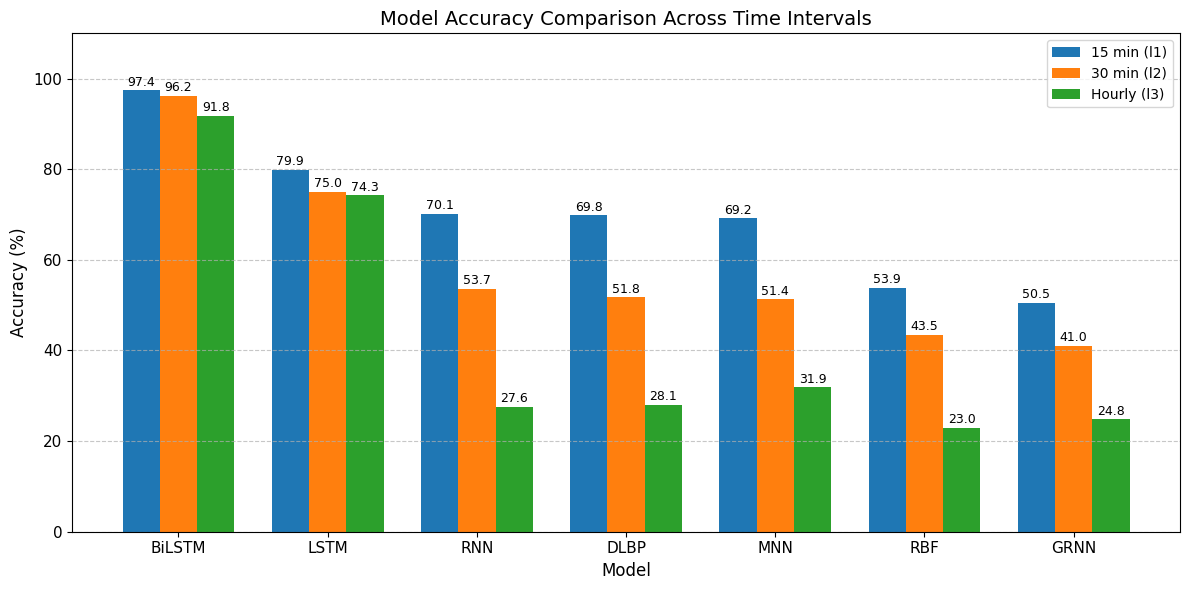

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ["BiLSTM", "LSTM", "RNN", "DLBP", "MNN", "RBF", "GRNN"]
l1 = [97.43, 79.89, 70.12, 69.80, 69.22, 53.87, 50.49]
l2 = [96.19, 75.02, 53.66, 51.77, 51.35, 43.48, 41.04]
l3 = [91.81, 74.29, 27.55, 28.06, 31.87, 22.96, 24.83]

# Position of bars on x-axis
x = np.arange(len(models))
width = 0.25  # Width of each bar

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(x - width, l1, width, label='15 min (l1)', color='#1f77b4')
plt.bar(x, l2, width, label='30 min (l2)', color='#ff7f0e')
plt.bar(x + width, l3, width, label='Hourly (l3)', color='#2ca02c')

# Adding labels and title
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Model Accuracy Comparison Across Time Intervals', fontsize=14)
plt.xticks(x, models, fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, 110)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optional: add values on top of bars
for i in range(len(models)):
    plt.text(x[i] - width, l1[i] + 1, f"{l1[i]:.1f}", ha='center', fontsize=9)
    plt.text(x[i], l2[i] + 1, f"{l2[i]:.1f}", ha='center', fontsize=9)
    plt.text(x[i] + width, l3[i] + 1, f"{l3[i]:.1f}", ha='center', fontsize=9)

plt.tight_layout()
plt.savefig("fig1.png")
plt.show()


In [2]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np

In [6]:
x = sp.symbols("x")
func = -2*x / (1120 - 2*x)
lambdified = sp.lambdify(x, func, "numpy")

x_values = np.linspace(100, 200, 100)
y_values = lambdified(x_values)

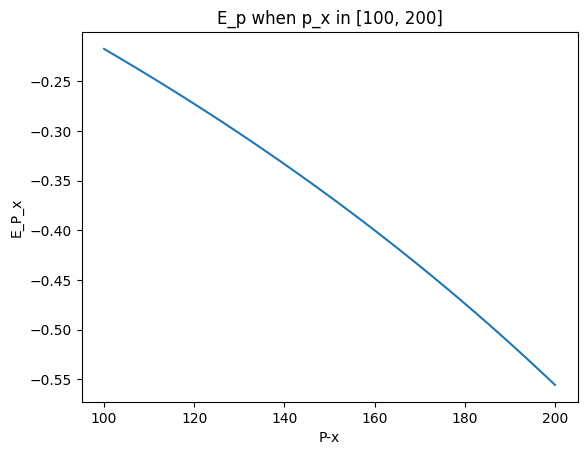

In [9]:
plt.plot(x_values, y_values)
plt.title("E_p when p_x in [100, 200]")
plt.xlabel("P-x")
plt.ylabel("E_P_x")
plt.savefig("q4.png")

In [16]:
n = sp.symbols("n")
p_n = (sp.exp(-4) * 4**n)/(sp.factorial(n))
p_n.subs(n, 1).evalf(4)

0.07326

In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Suppose your original data is in this format:
# Columns: I, C, S, W, t_work, t_shopping
original_df = pd.read_csv("data.csv")

# Create long-form data with duplicated rows and a B column
df_work = original_df[['I', 'C', 'S', 'W', 't1']].copy()
df_work.rename(columns={'t1': 't'}, inplace=True)
df_work['B'] = 1

df_shop = original_df[['I', 'C', 'S', 'W', 't2']].copy()
df_shop.rename(columns={'t2': 't'}, inplace=True)
df_shop['B'] = 0

# Concatenate both
df = pd.concat([df_work, df_shop], ignore_index=True)

# Create interaction features
df['IB'] = df['I'] * df['B']
df['CB'] = df['C'] * df['B']
df['SB'] = df['S'] * df['B']
df['WB'] = df['W'] * df['B']

df['I_notB'] = df['I'] * (1 - df['B'])
df['C_notB'] = df['C'] * (1 - df['B'])
df['S_notB'] = df['S'] * (1 - df['B'])
df['W_notB'] = df['W'] * (1 - df['B'])

df['B_intercept'] = df['B']

# Fit model
X = df[['IB', 'CB', 'SB', 'WB', 'I_notB', 'C_notB', 'S_notB', 'W_notB', 'B_intercept']]
y = df['t']

model = LinearRegression()
model.fit(X, y)

# Results
print("Intercept:", model.intercept_)
for name, coef in zip(X.columns, model.coef_):
    print(f"{name}: {coef:.4f}")


Intercept: -0.8009370117393799
IB: -0.0000
CB: -0.0410
SB: -0.0024
WB: 0.8228
I_notB: 0.0000
C_notB: 0.1361
S_notB: 0.2471
W_notB: 0.0279
B_intercept: 1.1010


In [11]:
import pandas as pd
import statsmodels.api as sm

# Your data (same setup as before)
original_df = pd.read_csv("data.csv")

# Create long-form data with duplicated rows and a B column
df_work = original_df[['I', 'C', 'S', 'W', 't1']].copy()
df_work.rename(columns={'t1': 't'}, inplace=True)
df_work['B'] = 1

df_shop = original_df[['I', 'C', 'S', 'W', 't2']].copy()
df_shop.rename(columns={'t2': 't'}, inplace=True)
df_shop['B'] = 0

# Concatenate both
df = pd.concat([df_work, df_shop], ignore_index=True)

# Create interaction features
df['a1'] = df['I'] * df['B']
df["a11"] = df["I"] * df["B"]
df['a2'] = df['C'] * df['B']
df['a3'] = df['S'] * df['B']
df['a4'] = df['W'] * df['B']

df['a5'] = df['I'] * (1 - df['B'])
df['a6'] = df['C'] * (1 - df['B'])
df['a7'] = df['S'] * (1 - df['B'])
df['a8'] = df['W'] * (1 - df['B'])

df['B_intercept'] = df['B']

# Fit model using statsmodels
X = df[["a1", "a11", "a2", "a3", "a4", "a5", "a6", "a7", "a8", 'B_intercept']]
# X = df[["a1", "a2", "a3", "a4", "a5", "a6", "a7", "a8", 'B_intercept']]
y = df['t']

# Add constant (intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the full regression summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      t   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     27.76
Date:                Sun, 18 May 2025   Prob (F-statistic):           3.57e-12
Time:                        09:29:42   Log-Likelihood:                -6.8057
No. Observations:                  40   AIC:                             33.61
Df Residuals:                      30   BIC:                             50.50
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.8009      0.409     -1.956      

In [5]:
X

,const,a1,a11,a2,a3,a4,a5,a6,a7,a8,B_intercept
0,1.0,61000,61000,3,1,1,0,0,0,0,1
1,1.0,36000,36000,1,6,5,0,0,0,0,1
2,1.0,75000,75000,2,5,1,0,0,0,0,1
3,1.0,60000,60000,3,4,1,0,0,0,0,1
4,1.0,54000,54000,1,5,3,0,0,0,0,1
5,1.0,30000,30000,1,1,1,0,0,0,0,1
6,1.0,62000,62000,1,5,2,0,0,0,0,1
7,1.0,44000,44000,1,5,4,0,0,0,0,1
8,1.0,44000,44000,0,4,3,0,0,0,0,1
9,1.0,54000,54000,2,1,1,0,0,0,0,1


In [23]:
I, C, S, W, B = sp.symbols("I, C, S, W, B")

t = -0.8009 + 1.1010 * B * (-4.746e-6*I -0.0410 * C -0.0024*S +0.8228*W) + 1.1010 * (1-B)*(2.399e-05*I+0.1361*C + 0.2471*S+0.0279*W)

In [31]:
# t.subs(B, 0).subs(I, 30000).subs(C, 1.4).subs(S, 2.1).subs(W, 1.4)
# t.subs(B, 0).subs(I, 25000).subs(C, 1.8).subs(S, 2.5).subs(W, 1.1)
# t.subs(B, 0).subs(I, 55000).subs(C, 2.5).subs(S, 2.3).subs(W, 1.5)
t.subs(B, 0).subs(I, 85000).subs(C, 1.1).subs(S, 1.5).subs(W, 1.3)

2.05705378000000

In [32]:
a, b, c = sp.symbols("a, b, c")
wt = 2500 + a/3000 + b/250
st = -3500 + a/100 + c/250

In [37]:
a1, b1, c1 = 30000, 2e6, 5e6
wt.subs(a, a1).subs(b, b1), st.subs(a, a1).subs(c, c1)

(10510.0000000000, 16800.0000000000)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
income = [0, 0, 1, 1, 1, 2, 2, 2, 3]
vehicles = [0, 1, 0, 1, 2, 1, 2, 3, 1]
trips = [3, 5, 4.5, 7, 10, 8.33, 11, 14, 9]



In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Given data
income = [0, 0, 1, 1, 1, 2, 2, 2, 3]     # x-axis
vehicles = [0, 1, 0, 1, 2, 1, 2, 3, 1]   # y-axis
trips = [3, 5, 4.5, 7, 10, 8.33, 11, 14, 9]  # z-axis


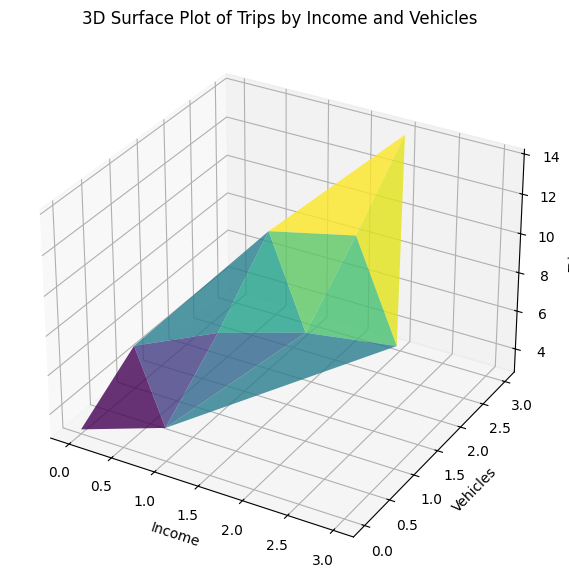

In [10]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create the 3D surface using triangulation
ax.plot_trisurf(income, vehicles, trips, cmap='viridis', edgecolor='none', alpha=0.8)

# Label axes
ax.set_xlabel('Income')
ax.set_ylabel('Vehicles')
ax.set_zlabel('Trips')
ax.set_title('3D Surface Plot of Trips by Income and Vehicles')
plt.savefig("q9.png")
plt.show()


In [11]:
import numpy as np

P = np.array([2200, 4000, 1500, 3700, 1300, 2000, 3500, 1000, 3500])  # p_i
A = np.array([9200, 11600, 1900])  # a_j

D = np.array([
    [4.3, 13.3, 10.8],
    [4.5, 9.5, 10.0],
    [8.5, 13.5, 11.0],
    [6.5, 7.5, 8.0],
    [8.1, 15.6, 10.6],
    [11.5, 7.0, 8.0],
    [13.5, 7.0, 10.0],
    [9.6, 17.1, 12.1],
    [12.6, 14.5, 9.5]
])


In [13]:
T = []

for i in range(9):
    T.append([])
    for j in range(3):
        below = 0
        for z in range(3):
            below += A[z]/(D[i, z]**2)
        t = P[i] * (A[j]/(D[i, j]**2)) / below
        T[-1].append(t)

In [53]:
T

[[1712.3297333823007, 400.1173940706726, 87.55287254702695],
 [2552.810487471914, 1280.4505080055067, 166.7390045225791],
 [721.5681842931082, 639.4610474571111, 138.97076824978058],
 [1279.3876088753914, 2148.190200512664, 272.42219061194504],
 [725.8414701660577, 437.45060651299036, 136.70792332095203],
 [259.74133791952056, 1567.137411220169, 173.12125086031054],
 [353.45053564547106, 2938.7761428500594, 207.77332150446958],
 [524.2215996611317, 369.34443609729476, 106.43396424157362],
 [1075.1387165183935, 1814.830174898337, 610.0311085832694]]

In [54]:
a1, a2, a3, a4, a5, a6, a7, a8, a9 = 0, 0, 0, 0, 0, 0, 0, 0, 0
for i in range(3):
    a1 += T[0][i]
    a2 += T[1][i]
    a3 += T[2][i]
    a4 += T[3][i]
    a5 += T[4][i]
    a6 += T[5][i]
    a7 += T[6][i]
    a8 += T[7][i]
    a9 += T[8][i]
a1, a2, a3, a4, a5, a6, a7, a8, a9

(2200.0000000000005,
 4000.0,
 1500.0,
 3700.0000000000005,
 1300.0,
 2000.0000000000002,
 3500.0,
 1000.0,
 3500.0)

In [55]:
a1, a2, a3 = 0, 0, 0
for i in range(9):
    a1 += T[i][0]
    a2 += T[i][1]
    a3 += T[i][2]
a1, a2, a3

(9204.489673933289, 11595.757921624805, 1899.752404441907)

In [56]:
m1 = A[0]/a1
m2 = A[1]/a2
m3 = A[2]/a3
print(m1, m2, m3)
for i in range(9):
    T[i][0] = T[i][0] * m1
    T[i][1] = T[i][1] * m2
    T[i][2] = T[i][2] * m3

T

0.999512229999453 1.000365830194444 1.0001303304354368


[[1711.494510307312, 400.26376909474595, 87.56428335102974],
 [2551.5653030990434, 1280.9189354638263, 166.76073568964281],
 [721.2162249794608, 639.6949816164417, 138.98888037051955],
 [1278.7635619807104, 2148.9760733514204, 272.45769551467015],
 [725.4874264717578, 437.61063915343067, 136.7257405241261],
 [259.61464388698147, 1567.7107174040361, 173.1438138283185],
 [353.2781330775059, 2939.8512358978255, 207.8004006919334],
 [523.9659000911782, 369.479553444169, 106.44783582647848],
 [1074.6142961060493, 1815.494094574103, 610.1106142032811]]

In [50]:
a1, a2, a3 = 0, 0, 0
for i in range(9):
    a1 += T[i][0]
    a2 += T[i][1]
    a3 += T[i][2]
a1, a2, a3

(9199.999999999996, 11599.999999999998, 1900.0)

In [51]:
a1, a2, a3, a4, a5, a6, a7, a8, a9 = 0, 0, 0, 0, 0, 0, 0, 0, 0
for i in range(3):
    a1 += T[0][i]
    a2 += T[1][i]
    a3 += T[2][i]
    a4 += T[3][i]
    a5 += T[4][i]
    a6 += T[5][i]
    a7 += T[6][i]
    a8 += T[7][i]
    a9 += T[8][i]
a1, a2, a3, a4, a5, a6, a7, a8, a9

(2196.701506120774,
 3996.3206383786182,
 1499.5118523964795,
 3700.9593214108318,
 1299.1405225874494,
 2002.2879462078467,
 3504.5355990504677,
 999.4791885072693,
 3501.063425340261)

In [52]:
m1 = P[0]/a1
m2 = P[1]/a2
m3 = P[2]/a3
m4 = P[3]/a4
m5 = P[4]/a5
m6 = P[5]/a6
m7 = P[6]/a7
m8 = P[7]/a8
m9 = P[8]/a9

for i in range(3):
    T[0][i] = T[0][i] * m1
    T[1][i] = T[1][i] * m2
    T[2][i] = T[2][i] * m3
    T[3][i] = T[3][i] * m4
    T[4][i] = T[4][i] * m5
    T[5][i] = T[5][i] * m6
    T[6][i] = T[6][i] * m7
    T[7][i] = T[7][i] * m8
    T[8][i] = T[8][i] * m9

T

[[1712.3297333823007, 400.1173940706726, 87.55287254702695],
 [2552.810487471914, 1280.4505080055067, 166.7390045225791],
 [721.5681842931082, 639.4610474571111, 138.97076824978058],
 [1279.3876088753914, 2148.190200512664, 272.42219061194504],
 [725.8414701660577, 437.45060651299036, 136.70792332095203],
 [259.74133791952056, 1567.137411220169, 173.12125086031054],
 [353.45053564547106, 2938.7761428500594, 207.77332150446958],
 [524.2215996611317, 369.34443609729476, 106.43396424157362],
 [1075.1387165183935, 1814.830174898337, 610.0311085832694]]

In [57]:
F = []
for i in range(9):
    F.append([])
    for j in range(3):
        below = 0
        for z in range(3):
            below += A[z]/D[i, z]**2
        F[-1].append(1/((D[i, j]**2) * below))
F

[[9.333826803643725e-05, 9.756484685362228e-06, 1.4796164060302853e-05],
 [8.205114684376682e-05, 1.8410368128379815e-05, 1.661535723586278e-05],
 [6.696518679909971e-05, 2.6547241405953114e-05, 3.998541112590871e-05],
 [5.217250003826889e-05, 3.918734447318863e-05, 3.444200197838845e-05],
 [7.442232908477503e-05, 2.0064303958136465e-05, 4.3457182371414114e-05],
 [2.250511899958431e-05, 6.0740856891735205e-05, 4.6504718557734765e-05],
 [1.79186910140233e-05, 6.664655994501523e-05, 3.265681437305746e-05],
 [7.116424142561474e-05, 2.242911148655878e-05, 4.479541349487504e-05],
 [4.694507681611843e-05, 3.544827774233989e-05, 8.25817218318777e-05]]

In [58]:
F = np.array(F)

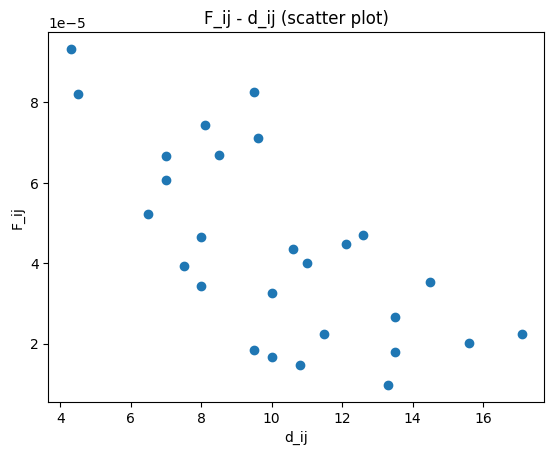

In [63]:
plt.scatter(D.flatten(), F.flatten())
plt.xlabel("d_ij")
plt.ylabel("F_ij")
plt.title("F_ij - d_ij (scatter plot)")
plt.savefig("q12_10.png")

In [65]:
import numpy as np

F_flat = F.flatten()
D_flat = D.flatten()

inv_d2 = 1 / (D_flat ** 2)

c_fit = np.sum(F_flat * inv_d2) / np.sum(inv_d2 ** 2)

F_pred = c_fit * inv_d2

SS_res = np.sum((F_flat - F_pred) ** 2)
SS_tot = np.sum((F_flat - np.mean(F_flat)) ** 2)
R_squared = 1 - (SS_res / SS_tot)

print("Best-fit c:", c_fit)
print("R2:", R_squared)


Best-fit c: 0.0023833213197446924
R2: -0.023968949278142748


In [66]:
from scipy.optimize import linprog

# Variable order: x_AB, x_AC, x_AD, x_BC, x_BD, x_CD
# Objective: minimize or maximize total trips = sum(x)

c_min = [1, 1, 1, 1, 1, 1]       # Minimize total trips
c_max = [-1, -1, -1, -1, -1, -1] # Maximize total trips (negated for linprog)

A_eq = [
    [1, 1, 1, 0, 0, 0],   # A->B
    [0, 1, 1, 1, 1, 0],   # B->C
    [0, 0, 1, 0, 1, 1]    # C->D
]
b_eq = [60, 80, 40]

bounds = [(0, None)] * 6  # All flows ≥ 0

# Solve minimization
res_min = linprog(c=c_min, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')
# Solve maximization
res_max = linprog(c=c_max, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

print("Minimum Total Trips:", res_min.fun)
print("OD Matrix (min):", res_min.x)

print("Maximum Total Trips:", -res_max.fun)  # Negated back
print("OD Matrix (max):", res_max.x)


Minimum Total Trips: 80.0
OD Matrix (min): [ 0. 20. 40. 20.  0.  0.]
Maximum Total Trips: 180.0
OD Matrix (max): [60.  0.  0. 80.  0. 40.]
